In [572]:
from ipstartup import *
import geopandas as gpd
from shapely.geometry import Polygon, MultiPoint, LineString, MultiPolygon
from mapboxer import Map
from mapboxer.utils import replace_quotes, iframe

[cellevents:43:INFO]:starting (time=Aug-16 17:54 MainProcess)


time: 3.01 ms


In [301]:
df = pd.read_csv(r"C:\Users\simon\Downloads\connect_data_with_geocodes.csv")
df = df[df.longitude.notnull() & df.latitude.notnull()]
df = df.rename(columns=dict(localauthorityname="auth", pollingdistrictname="pd", longitude="lon", latitude="lat"))
replace_quotes(df)
df = df[df.wardname.str.startswith("Dorchester")]
df.head(1)

[cellevents:43:INFO]:starting (time=Aug-16 15:58 MainProcess)


,vanid,lat,lon,auth,wardname,pollingdistrictcode,pd,postalcode,likelypartyname,recent_mpid,tps,tory_facing,life_stage,register_history,volunteer_prospects
254,4932106,50.707157,-2.44065,Dorset,Dorchester East,DRE4,DRE4 - Dorchester South,DT1 1QN,No Data,NaN,Lnd,Sw+,60+,VN,NaN


time: 614 ms


[cellevents:43:INFO]:starting (time=Aug-16 18:00 MainProcess)


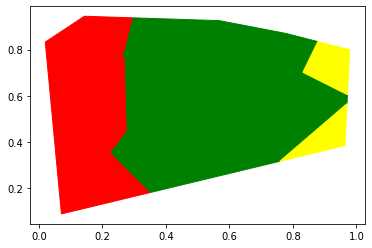

time: 299 ms


In [576]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# test data
np.random.seed(0)
points = np.random.rand(15,2)
df = pd.DataFrame(points, columns=["x", "y"])
df.loc[df.x<.2, "ward"] = "red"
df.loc[df.x>.8, "ward"] = "yellow"
df.ward = df.ward.fillna("green")
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))
dfborder = MultiPoint([p for p in df.geometry]).convex_hull

# add extra points
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# voroni regions
vor = Voronoi(points)
df["geometry"] = [Polygon(vor.vertices[vor.regions[i]]) for i in vor.point_region[:-4]]

# dissolve and clip
wards = vr.dissolve(by="ward")
clipped = gpd.clip(wards, dfborder).reset_index()

for i,row in clipped.iterrows():
    if isinstance(row.geometry, MultiPolygon):
        for x in row.geometry:
            plt.fill(*x.exterior.xy, color=row.ward)
    else:
        plt.fill(*row.geometry.exterior.xy, color=row.ward)
    
plt.show()

In [304]:
# check no overlap in polys
df = pd.DataFrame(df, columns=["auth", "wardname", "pd", "lon", "lat"])
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
for i, row in df.iterrows():
    if p.contains(row.geometry):
        print(i)

[cellevents:43:INFO]:starting (time=Aug-16 15:58 MainProcess)


time: 1.77 s


In [ ]:
# add crop area lines to lines
# polygonise
# look up regionpoint

In [308]:
m = Map()
m.center = [-1.7083, 52.1917]
m.zoom = 10
m.add_source("wards", gdf)
m.add_layer("wards", type="line", source="wards")
iframe(m.html())

[cellevents:43:INFO]:starting (time=Aug-16 16:00 MainProcess)


time: 1.7 s
